# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Jelang Ramadhan
- **Email:** m284b4ky2050@bangkit.academy
- **ID Dicoding:** jlaanng

## Menentukan Pertanyaan Bisnis

- Pada musim apa masyarakat merental sepeda?

- Pada saat jam berapa rental sepeda banyak dikunjungi oleh calon pembeli?
- Apakah cuaca mempengaruhi rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Memanggil Data dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Memanggil data day.csv
day_df=pd.read_csv("/content/drive/MyDrive/DATA/BIKE/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Memanggil data hour.csv
hour_df=pd.read_csv("/content/drive/MyDrive/DATA/BIKE/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita mendapatkan informasi tentang data rental sepeda pada tiap harinya
- Kita mendapatkan informasi tentang data rental sepeda pada setiap jamnya

### Assessing Data

In [ ]:
# Assesing Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
# Assesing Data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ditemuakan format yang tidak sesuai pada dteday harusnya dalam datetime
- Hal tersebut ditemukan pada day_df dan hour_df

### Cleaning Data

In [ ]:
#Mengubah format dteday pada day_df
kolom_datetime=["dteday"]

for kolom in kolom_datetime:
  day_df[kolom]=pd.to_datetime(day_df[kolom])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#Mengubah format dteday pada hour_df
kolom_datetime=["dteday"]

for kolom in kolom_datetime:
  hour_df[kolom]=pd.to_datetime(hour_df[kolom])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Format dteday telah diubah ke datetime


## Exploratory Data Analysis (EDA)

### Mengekploarasi rental sepeda berdasarkan musim

In [ ]:
#Melihat persebaran rental sepeda pada setiap musim
day_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


###Melihat tren untuk menentukan kapan waktu yang sering dikunjungi custumers

In [ ]:
#Melihat waktu yang sering dikunjingi custumers
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
12,383
15,383
13,377


###Clustering By Wheatersit

In [ ]:
hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,instant,cnt
weathersit,,
1,11413,2338173
2,4544,795952
3,1419,158331
4,3,223


**Insight:**
- Ditemukan bahwa rental sepeda pada musim 3 (*fall*)
- Ditemukan bahwa custumers sering merental sepeda pada jam 17.00
- Ditemukan cuaca kategori 1 (*Clear, Few clouds, Partly cloudy, Partly cloudy*) disukai perental sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:Pada musim apa masyarakat merental sepeda?

<ipython-input-38-02a7cda224b7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

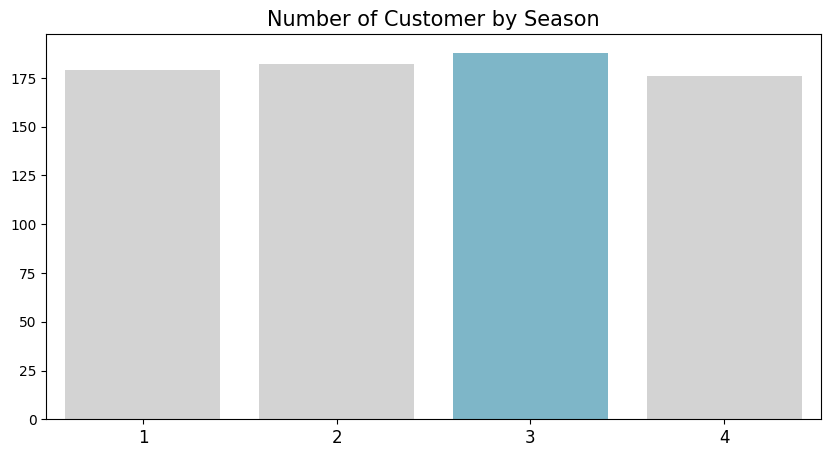

In [ ]:
byseason_df = day_df.groupby(by="season").cnt.nunique().reset_index()
byseason_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3",  "#D3D3D3","#72BCD4", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Pada saat jam berapa rental sepeda banyak dikunjungi oleh calon pembeli?

<ipython-input-84-85e87bafa712>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-84-85e87bafa712>:13: UserWarning: 
The palette list has fewer values (18) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = group

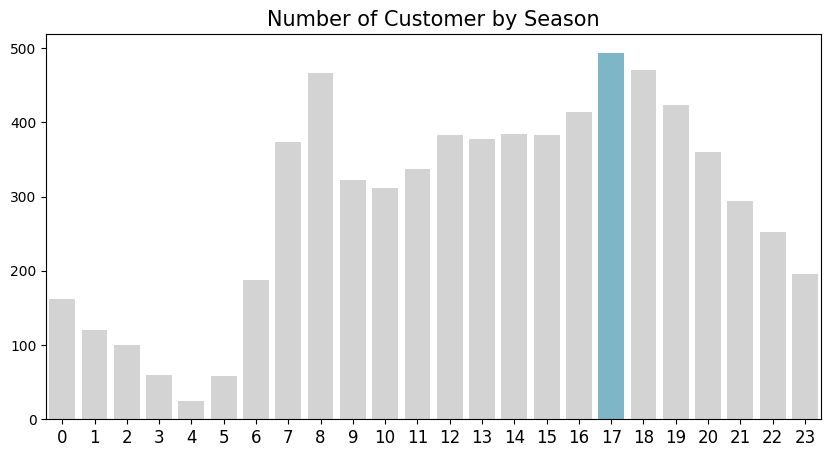

In [ ]:
byhour_df = hour_df.groupby(by="hr").cnt.nunique().reset_index()
byhour_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3",  "#D3D3D3", "#D3D3D3","#D3D3D3",  "#D3D3D3", "#D3D3D3",
           "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3",  "#D3D3D3", "#D3D3D3",
           "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3",  "#D3D3D3", "#72BCD4"
]


sns.barplot(
    y="customer_count",
    x="hr",
    data=byhour_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.show()

###Apakah cuaca mempengaruhi rental sepeda?

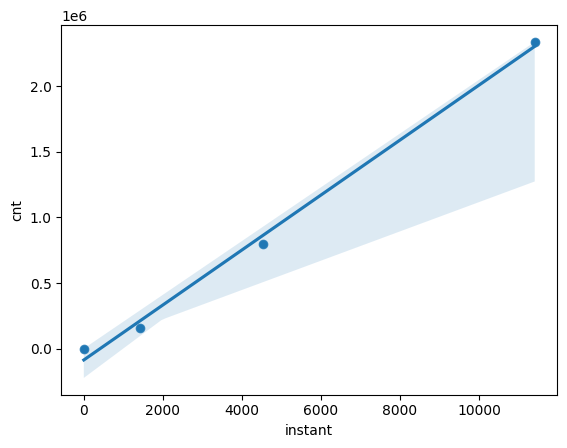

In [ ]:
rent = hour_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

sns.scatterplot(data=rent, x="instant", y="cnt")
sns.regplot(data=rent,x="instant", y="cnt")
plt.show()

#Tujuan dilakuakan pembuatan garis regresi ini adalah untuk mengetahui hubungan anatara cuaca dan jumlah perental sepeda


**Insight:**
- Diketahui bahwa banyak yang menyewa sepeda pada musim 3 (fall), yaitu sebanyak 188
- Diketahui bahwa pada jam 17.00 merupakan waktu paling banyak penyewa sepeda, yaitu sebanyak 494
- Diketahui bahwa cuaca mempengaruhi jumlah rental sepeda.

## Conclusion

- Conclution pertanyaan 1 : Kebanyakan orang menyewa sepeda saat fall
- Conclution pertanyaan 2 : Jam 17.00 merupakan waktu penyewa sepeda terbanyak
- Conclution pertanyaan 3 : Menurut garis regresi menyatakan cuaca mempengaruhi jumlah rental sepeda

###TO_DASHBOARD


In [ ]:
hour_df.to_csv("hour_data.csv", index=False)

In [ ]:
day_df.to_csv("day_data.csv", index=False)